In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [213]:
df = pd.read_csv('Credit_card.csv')
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [214]:
df_label =  pd.read_csv('Credit_card_label.csv')
df_label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [215]:
df_merged = df.merge(df_label, on="Ind_ID", how='left')
df_merged

# looking at the label on the far right. 0 = cc accepted, 1 = cc rejected

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [216]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [217]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


Keeping up the data and removing Null values

In [218]:
df_merged.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [219]:
df_merged.dropna(subset='GENDER', inplace=True)
df_merged.isnull().sum()

Ind_ID               0
GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    486
Family_Members       0
label                0
dtype: int64

In [220]:
df_merged.value_counts('GENDER')

GENDER
F    973
M    568
Name: count, dtype: int64

In [221]:
df_merged.drop(columns=("Type_Occupation"), inplace=True)

In [222]:
df_merged.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label'],
      dtype='object')

In [223]:
df_merged.dropna(inplace=True)
df_merged.isna().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

In [224]:
df_merged.duplicated().sum() 

np.int64(0)

Getting the average income

In [225]:
average_annual_income = df_merged['Annual_income'].mean()
average_annual_income

np.float64(190775.04846256683)

In [226]:
gender_based_income = df_merged.groupby('GENDER')['Annual_income'].mean()
gender_based_income.sort_values(ascending=False)
# In this dataset, males have a higher annual income than females

GENDER
M    222485.245902
F    172391.840021
Name: Annual_income, dtype: float64

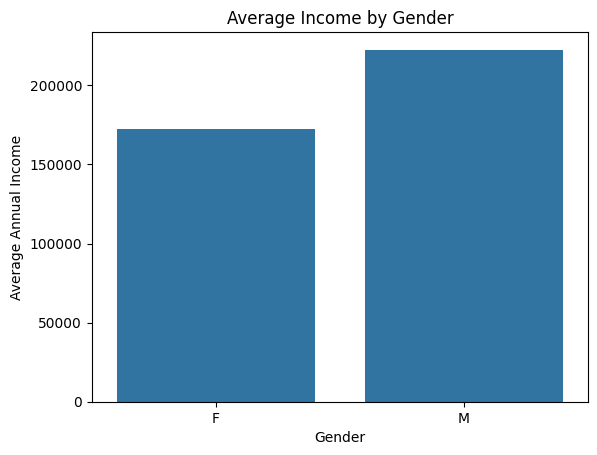

In [227]:
sns.barplot(x=gender_based_income.index, y=gender_based_income.values)
plt.title("Average Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Annual Income")
plt.show()

In [228]:
label_count = df_merged["label"].value_counts()
label_count

label
0    1336
1     160
Name: count, dtype: int64

Text(0.5, 1.0, 'Credit Approval Status')

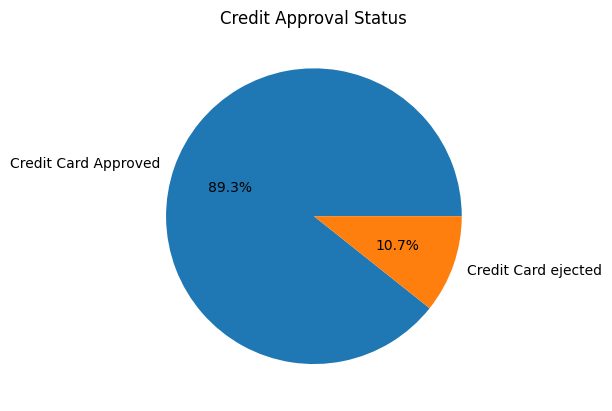

In [229]:
plt.pie(label_count, labels=["Credit Card Approved", "Credit Card ejected"],  autopct="%1.1f%%")
plt.title("Credit Approval Status")

Group by type of income, then calculate the mean using annual income

In [230]:
df_merged.groupby("Type_Income")["Annual_income"].mean().sort_values(ascending=False)


Type_Income
Commercial associate    233880.169972
State servant           210130.434783
Working                 180154.579974
Pensioner               154964.866795
Name: Annual_income, dtype: float64

Group by Martial status

In [231]:
df_merged.groupby("Marital_status")["Employed_days"].mean().round(2)

Marital_status
Civil marriage           30026.98
Married                  50073.89
Separated                77952.23
Single / not married     51481.50
Widow                   222997.52
Name: Employed_days, dtype: float64

In [232]:
df_merged.groupby("Housing_type")["Family_Members"].sum()

Housing_type
Co-op apartment           5
House / apartment      2900
Municipal apartment      92
Office apartment         21
Rented apartment         46
With parents            175
Name: Family_Members, dtype: int64

In [233]:
age = df_merged['Birthday_count']
age.fillna(np.mean(age), inplace=True)
age = np.abs(age / 365).round().astype(int)
age

0       51
1       37
4       37
6       37
7       61
        ..
1542    31
1544    28
1545    36
1546    42
1547    45
Name: Birthday_count, Length: 1496, dtype: int64

In [234]:
df_merged.drop('Birthday_count', axis=1, inplace=True)
df_merged.shape

(1496, 17)

In [235]:
df_merged['age'] = age
df_merged.shape

(1496, 18)

In [236]:
df_merged.groupby("GENDER")["age"].min()

GENDER
F    23
M    21
Name: age, dtype: int64

In [237]:
df_merged.groupby("CHILDREN")["Annual_income"].mean().round(2)

CHILDREN
0     182400.74
1     215498.66
2     203309.30
3     177862.50
4     180000.00
14    225000.00
Name: Annual_income, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

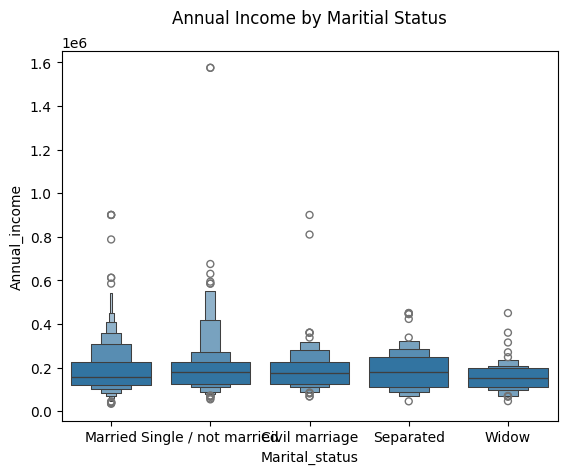

In [238]:
sns.boxenplot(x = "Marital_status", y = "Annual_income", data=df_merged)
plt.title("Annual Income by Maritial Status", pad=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

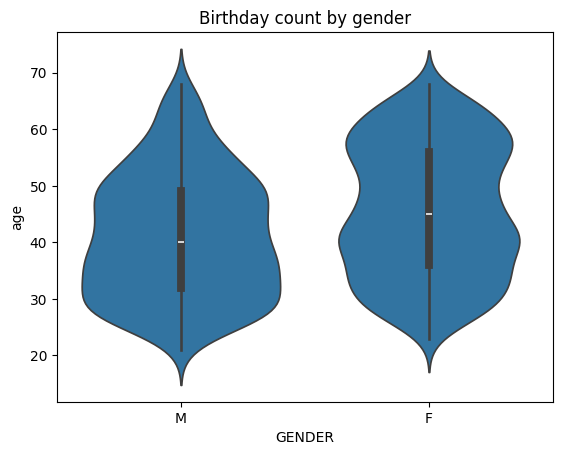

In [239]:
sns.violinplot(x = "GENDER", y = "age", data=df_merged)
plt.title("Birthday count by gender")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

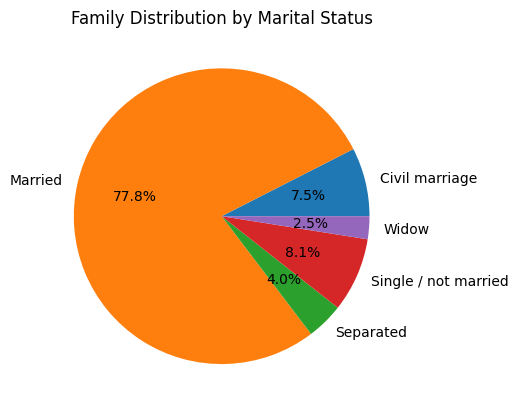

In [240]:
marital_count = df_merged.groupby("Marital_status")["Family_Members"].sum()
marital_count.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")
plt.title("Family Distribution by Marital Status")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

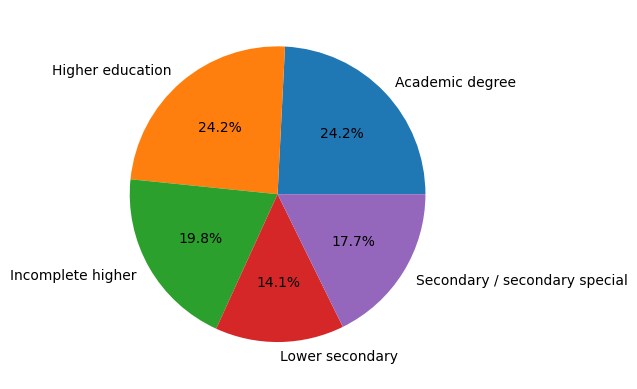

In [241]:
average_ai_education = df_merged.groupby("EDUCATION")["Annual_income"].mean()
average_ai_education.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")
plt.show

In [242]:
# 1. Replace the 'magic number' with 0 first
df_merged['Employed_days'] = df_merged['Employed_days'].replace(365243, 0)

# 2. Then convert to years
df_merged["Employed_years"] = np.abs(df_merged["Employed_days"] / 365).round()
df_merged.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label,age,Employed_years
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,0,1,0,0,0,2,1,51,0.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,1,1,1,0,2,1,37,2.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,1,1,1,0,2,1,37,2.0
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,1,1,1,0,2,1,37,2.0
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0,1,0,0,0,2,1,61,0.0


In [243]:
features = ["Car_Owner", "Propert_Owner", "EDUCATION", "age", "Employed_years"]
target = "label"
df_model = df_merged[features + [target]].dropna().copy()


In [244]:
label_encoder = preprocessing.LabelEncoder()
for col in ["Car_Owner", "Propert_Owner", "EDUCATION"]:
    df_model[col] = label_encoder.fit_transform(df_model[col])

In [245]:
X = df_model[features]
y = df_model[target]


In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scalar = StandardScaler()
scaled_X_train = scalar.fit_transform(X_train)
scaled_X_test = scalar.transform(X_test)

In [247]:
def performance(rf_pred):
    print("Accuracy score: {}".format(accuracy_score(y_test, rf_pred))) 

In [248]:
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(scaled_X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [249]:
rf_pred = rf.predict(scaled_X_test)
performance(rf_pred)

Accuracy score: 0.8733333333333333


In [250]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       272
           1       0.34      0.39      0.37        28

    accuracy                           0.87       300
   macro avg       0.64      0.66      0.65       300
weighted avg       0.88      0.87      0.88       300



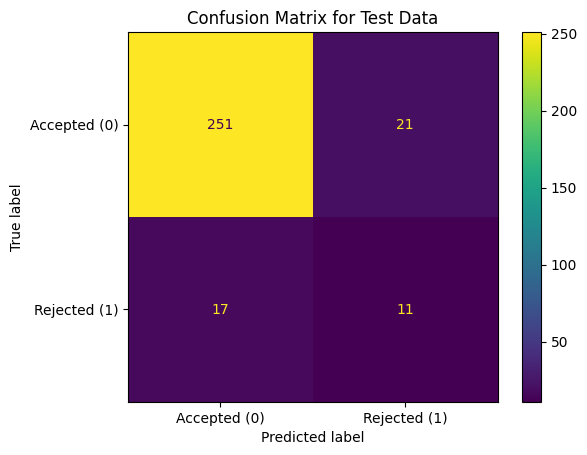

In [251]:
cm = confusion_matrix(y_test, rf_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Accepted (0)', 'Rejected (1)'])
disp.plot()
plt.title("Confusion Matrix for Test Data")
plt.show()

In [252]:
from sklearn.metrics import classification_report

# Run this to see the breakdown
print(classification_report(y_test, logistic_pred))

NameError: name 'logistic_pred' is not defined